# Assignment05

## Name: YangMyungCheol (양명철)
## ID: 20122776
## Submission Time: 2019.04.11. 05:00am

[K-means algorithm on color image]

Let $f(x)$ be a color image and $x$ be the index of image in the domain.
The values of image $f(x)$ consist of [red, green, blue] intensity.

Apply K-means algorithm to image $f(x)$ based on its color value with given number of clusters $K$ and visualize the progress of optimization and results of the algorithm for each selected number of clusters $K$.

1. Select any color image that consists of distinctive regions with different colors.
2. Apply K-means algorithm to the given image with at least 4 different choice of $K$.
3. For each $K$, plot the energy curve and the result image.


[Visualisation]

1. Input color image
2. Energy curve for each $K$
3. Output image for each $K$

[Energy]

$$ \frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2 $$

where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.

[Output Image]

$g(x) = m_c \
where \ label(x) = c$

Each pixel of the output image $g(x)$ should be its centroid $m_c$ where $c$ is the cluster label of $g(x)$.

Import Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import sys
import math
import random

Read image file

In [2]:
file_pix = 'student.jpg'
basic_pix = io.imread(file_pix) 
E = [] 
# storing energy list for iteration

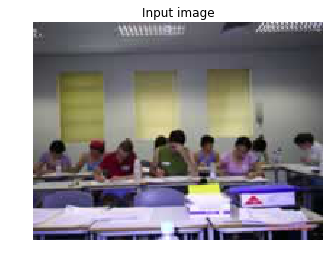

In [3]:
# 1. Input color image
plt.title('Input image')
plt.imshow(basic_pix)
plt.axis('off')
plt.show()

In [4]:
#Calculate row and column of pixel
pix_column = len(basic_pix)
pix_row = len(basic_pix[0])

pix_RGB consists of [Red, Green, Blue] 

Change one dimenstion from two dimension

In [ ]:
pix_RGB = []
append = pix_RGB.append


for i in range(pix_column):
    for j in range(pix_row):
        pix_RGB.append(basic_pix[i][j])


In [5]:
pix_RGB = []
append = pix_RGB.append


for i in range(pix_column):
    for j in range(pix_row):
        pix_RGB.append(basic_pix[i][j])


K-means

Choose K

In [6]:
#Choose K 
K = 5

pix_list = []
pixel_num = len(pix_RGB)

for i in range(pixel_num):
    ran_num = random.randint(0,K-1)
    pix_list.append(ran_num)



Define distance between the pixels using L2-norm

In [7]:
def dist_pixel(mean_pixel,input_pixel):
    a = np.array(mean_pixel)
    b = np.array(input_pixel)
    return sum((a-b)**2)


Set initial centroid randomly clustered with K

In [8]:
# divide clustering
list_of_grouplist = []
for i in range(K):
    list_c = []
    for j in range(len(pix_list)):
        if i == pix_list[j]:
            list_c.append(j)
    list_of_grouplist.append(list_c)

In [9]:
# initial centroid value
c_mean_pixel = []
for i in range(K):
    c_pixel = [0,0,0]
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        c_RGB = pix_RGB[num]
        c_pixel[0] += c_RGB[0]
        c_pixel[1] += c_RGB[1]
        c_pixel[2] += c_RGB[2]
    c_pixel[0] /= len(list_of_grouplist[i])
    c_pixel[1] /= len(list_of_grouplist[i])
    c_pixel[2] /= len(list_of_grouplist[i])
    c_mean_pixel.append(c_pixel)

Define computing engery function

In [10]:
def computeEnergy(): 
    energy = 0
    for i in range(pixel_num):
        for j in range(K):
            if i in list_of_grouplist[j]:
                a = np.array(c_mean_pixel[j])
                b = np.array(pix_RGB[i])
                energy_l2_norm = math.sqrt(sum((a-b)**2))
                energy += energy_l2_norm
    return energy/pixel_num


In [11]:
print(pix_RGB[1])


[68 67 72]


In [ ]:
pix_RGB

In [ ]:
dist_pixel(1,vec)

In [12]:
list_check = list_of_grouplist
iter_num = 0
# Energy list
E.append(computeEnergy())
while True:
        
    dist_of_mean = []
    for i in range(pixel_num):
        vec = pix_RGB[i]
        dist_of_pixel = []
        append = dist_of_pixel.append
        for j in c_mean_pixel:
            d = dist_pixel(j,vec)
            append(d)
        dist_of_mean.append(dist_of_pixel)

    list_of_grouplist = []
    for i in range(K):
        list = []
        list_of_grouplist.append(list)
    
    for i in range(pixel_num):
        label = dist_of_mean[i].index(min(dist_of_mean[i]))  #label는 label값이 저장된다.
        list_of_grouplist[label].append(i)
    
    #Record Energy result
    E.append(computeEnergy())
    iter_num += 1
    
    prev_centroid = c_mean_pixel
    c_mean_pixel = []
    for i in range(K):
        c_pixel = [0,0,0]
        for j in range(len(list_of_grouplist[i])):
            num = list_of_grouplist[i][j]
            c_RGB = pix_RGB[num]
            c_pixel[0] += c_RGB[0]
            c_pixel[1] += c_RGB[1]
            c_pixel[2] += c_RGB[2]
        c_pixel[0] /= len(list_of_grouplist[i])
        c_pixel[1] /= len(list_of_grouplist[i])
        c_pixel[2] /= len(list_of_grouplist[i])
        c_mean_pixel.append(c_pixel)
        
    if prev_centroid == c_mean_pixel:
        break

In [14]:
dist_of_mean[1]

[67091.59280094228,
 755.1316379876827,
 3455.1389132745244,
 8693.952231314594,
 28111.91677026134]

In [36]:
print(c_mean_pixel)

[[85.35903280150629, 80.97076602913488, 88.08145872559707], [214.1510161177295, 204.9323756131745, 235.42011212333566], [37.40876288659794, 30.596907216494845, 37.44381443298969], [173.00017182130586, 169.3491408934708, 153.31134020618558], [126.34588715159755, 121.75282121006119, 119.87314751869476]]


Change initial image pixel, and update each pixels with the average image of pixels on each cluster.

In [37]:
# insert int, round
for i in range(K):
    c_mean_pixel[i][0] = int(round(c_mean_pixel[i][0]))
    c_mean_pixel[i][1] = int(round(c_mean_pixel[i][1]))
    c_mean_pixel[i][2] = int(round(c_mean_pixel[i][2]))

# change RGB
for i in range(K):
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        pix_RGB[num] = c_mean_pixel[i]
        
# two dimen sion
last_pix =[]
for i in range(pix_column):
    last_pix_row = []
    append = last_pix_row.append
    for j in range(pix_row):
        num = i*pix_row + j
        pix_RGB_int = []
        pix_RGB_int.append(int(pix_RGB[num][0]))
        pix_RGB_int.append(int(pix_RGB[num][1]))
        pix_RGB_int.append(int(pix_RGB[num][2]))
        append(pix_RGB_int)
    last_pix.append(last_pix_row)
    

In [38]:
pix_RGB_array = np.array(pix_RGB)
last_pix = pix_RGB_array.reshape(pix_column, pix_row, -1)

# Image K = 5

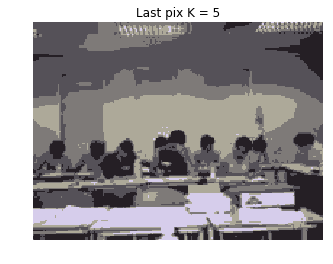

In [14]:
# Print output last_pix
# 3. Output image for each $K$

plt.figure(2)
plt.title('Last pix K = 5')
plt.imshow(last_pix)
plt.axis('off')
plt.show()


# EnergyPlot K = 5

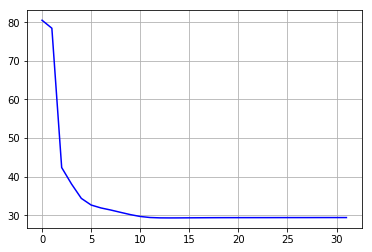

In [50]:
#2. Energy curve for each $K$
plt.figure(3)
x_range = np.arange(iter_num+1)
plt.plot(x_range,E,"b")
plt.grid(True)
plt.show()

In [53]:
len(E)

32

In [51]:
iter_num

31

In [52]:
print(E)

[80.51940036259997, 78.45152031594087, 42.35333303927308, 38.099789712875676, 34.365491796417196, 32.6435213400285, 31.8854611549512, 31.346507158268096, 30.742820008820583, 30.155003026417496, 29.67613345190227, 29.407572389636485, 29.316497429214586, 29.302550341348557, 29.31139854425662, 29.32844968498459, 29.341423655691493, 29.35584001852104, 29.365025271819142, 29.369689664143824, 29.372442904051518, 29.374180179066325, 29.37571416789151, 29.377091480118906, 29.381921790480177, 29.384644178708804, 29.38645232890495, 29.38730997927159, 29.392499261183758, 29.394428005941283, 29.395124080218903, 29.39496505485309]


# Clustering K = 6

In [16]:
K = 6
E = []

pix_RGB = []

for i in range(pix_column):
    for j in range(pix_row):
        pix_RGB.append(basic_pix[i][j])

pix_list = []
pixel_num = len(pix_RGB)

for i in range(pixel_num):
    ran_num = random.randint(0,K-1)
    pix_list.append(ran_num)
    
list_of_grouplist = []
for i in range(K):
    list_c = []
    for j in range(len(pix_list)):
        if i == pix_list[j]:
            list_c.append(j)
    list_of_grouplist.append(list_c) 
    
c_mean_pixel = []
for i in range(K):
    c_pixel = [0,0,0]
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        c_RGB = pix_RGB[num]
        c_pixel[0] += c_RGB[0]
        c_pixel[1] += c_RGB[1]
        c_pixel[2] += c_RGB[2]
    c_pixel[0] /= len(list_of_grouplist[i])
    c_pixel[1] /= len(list_of_grouplist[i])
    c_pixel[2] /= len(list_of_grouplist[i])
    c_mean_pixel.append(c_pixel)
    
list_check = list_of_grouplist
iter_num = 0
E.append(computeEnergy())
while True:
        
    dist_of_mean = []
    for i in range(pixel_num):
        vec = pix_RGB[i]
        dist_of_pixel = []
        append = dist_of_pixel.append
        for j in c_mean_pixel:
            d = dist_pixel(j,vec)
            append(d)
        dist_of_mean.append(dist_of_pixel)

    list_of_grouplist = []
    for i in range(K):
        list = []
        list_of_grouplist.append(list)
    
    for i in range(pixel_num):
        label = dist_of_mean[i].index(min(dist_of_mean[i]))  #label는 label값이 저장된다.
        list_of_grouplist[label].append(i)
    
    
    E.append(computeEnergy())
    iter_num += 1     
        
    prev_centroid = c_mean_pixel
    c_mean_pixel = []
    for i in range(K):
        c_pixel = [0,0,0]
        for j in range(len(list_of_grouplist[i])):
            num = list_of_grouplist[i][j]
            c_RGB = pix_RGB[num]
            c_pixel[0] += c_RGB[0]
            c_pixel[1] += c_RGB[1]
            c_pixel[2] += c_RGB[2]
        c_pixel[0] /= len(list_of_grouplist[i])
        c_pixel[1] /= len(list_of_grouplist[i])
        c_pixel[2] /= len(list_of_grouplist[i])
        c_mean_pixel.append(c_pixel)
        
    if prev_centroid == c_mean_pixel:
        break
        
for i in range(K):
    c_mean_pixel[i][0] = int(round(c_mean_pixel[i][0]))
    c_mean_pixel[i][1] = int(round(c_mean_pixel[i][1]))
    c_mean_pixel[i][2] = int(round(c_mean_pixel[i][2]))

for i in range(K):
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        pix_RGB[num] = c_mean_pixel[i]
        
last_pix =[]
for i in range(pix_column):
    last_pix_row = []
    append = last_pix_row.append
    for j in range(pix_row):
        num = i*pix_row + j
        pix_RGB_int = []
        pix_RGB_int.append(int(pix_RGB[num][0]))
        pix_RGB_int.append(int(pix_RGB[num][1]))
        pix_RGB_int.append(int(pix_RGB[num][2]))
        append(pix_RGB_int)
    last_pix.append(last_pix_row)
    

# Image K = 6

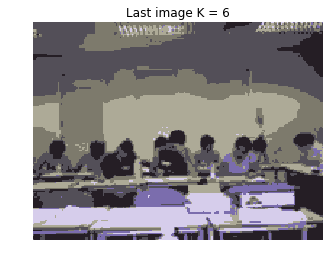

In [17]:
plt.figure(4)
plt.title('Last image K = 6')
plt.imshow(last_pix)
plt.axis('off')
plt.show()

# EnergyPlot K = 6

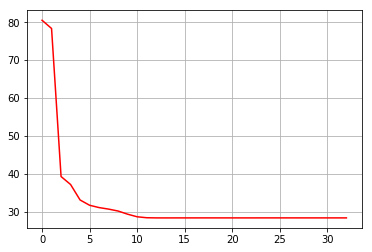

In [18]:
plt.figure(5)
x_range = np.arange(iter_num+1)
plt.plot(x_range,E,"r")
plt.grid(True)
plt.show()

# K = 8 Clustering

In [20]:
K = 8
E = []

pix_RGB = []

for i in range(pix_column):
    for j in range(pix_row):
        pix_RGB.append(basic_pix[i][j])

pix_list = []
pixel_num = len(pix_RGB)

for i in range(pixel_num):
    ran_num = random.randint(0,K-1)
    pix_list.append(ran_num)
    
list_of_grouplist = []
for i in range(K):
    list_c = []
    for j in range(len(pix_list)):
        if i == pix_list[j]:
            list_c.append(j)
    list_of_grouplist.append(list_c) 
    
c_mean_pixel = []
for i in range(K):
    c_pixel = [0,0,0]
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        c_RGB = pix_RGB[num]
        c_pixel[0] += c_RGB[0]
        c_pixel[1] += c_RGB[1]
        c_pixel[2] += c_RGB[2]
    c_pixel[0] /= len(list_of_grouplist[i])
    c_pixel[1] /= len(list_of_grouplist[i])
    c_pixel[2] /= len(list_of_grouplist[i])
    c_mean_pixel.append(c_pixel)
    
list_check = list_of_grouplist
iter_num = 0
E.append(computeEnergy())
while True:
    dist_of_mean = []
    for i in range(pixel_num):
        vec = pix_RGB[i]
        dist_of_pixel = []
        append = dist_of_pixel.append
        for j in c_mean_pixel:
            d = dist_pixel(j,vec)
            append(d)
        dist_of_mean.append(dist_of_pixel)

    list_of_grouplist = []
    for i in range(K):
        list = []
        list_of_grouplist.append(list)
    
    for i in range(pixel_num):
        label = dist_of_mean[i].index(min(dist_of_mean[i]))  #label는 label값이 저장된다.
        list_of_grouplist[label].append(i)
    
    
    E.append(computeEnergy())
    iter_num += 1
        
    prev_centroid = c_mean_pixel
    c_mean_pixel = []
    for i in range(K):
        c_pixel = [0,0,0]
        for j in range(len(list_of_grouplist[i])):
            num = list_of_grouplist[i][j]
            c_RGB = pix_RGB[num]
            c_pixel[0] += c_RGB[0]
            c_pixel[1] += c_RGB[1]
            c_pixel[2] += c_RGB[2]
        c_pixel[0] /= len(list_of_grouplist[i])
        c_pixel[1] /= len(list_of_grouplist[i])
        c_pixel[2] /= len(list_of_grouplist[i])
        c_mean_pixel.append(c_pixel)
        
    if prev_centroid == c_mean_pixel:
        break
        
for i in range(K):
    c_mean_pixel[i][0] = int(round(c_mean_pixel[i][0]))
    c_mean_pixel[i][1] = int(round(c_mean_pixel[i][1]))
    c_mean_pixel[i][2] = int(round(c_mean_pixel[i][2]))

for i in range(K):
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        pix_RGB[num] = c_mean_pixel[i]
        
last_pix =[]
for i in range(pix_column):
    last_pix_row = []
    append = last_pix_row.append
    for j in range(pix_row):
        num = i*pix_row + j
        pix_RGB_int = []
        pix_RGB_int.append(int(pix_RGB[num][0]))
        pix_RGB_int.append(int(pix_RGB[num][1]))
        pix_RGB_int.append(int(pix_RGB[num][2]))
        append(pix_RGB_int)
    last_pix.append(last_pix_row)

# Image K = 8

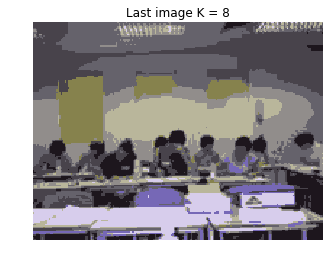

In [21]:
plt.figure(6)
plt.title('Last image K = 8')
plt.imshow(last_pix)
plt.axis('off')
plt.show()

# EnergyPlot K = 8

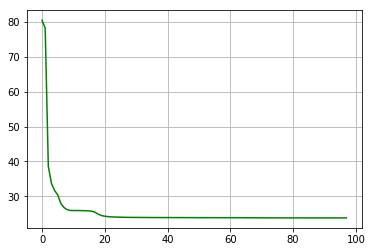

In [22]:
plt.figure(7)
x_range = np.arange(iter_num+1)
plt.plot(x_range,E,"g")
plt.grid(True)
plt.show()

# K = 3 Clustering

In [26]:
K = 3
E = []

pix_RGB = []

for i in range(pix_column):
    for j in range(pix_row):
        pix_RGB.append(basic_pix[i][j])

pix_list = []
pixel_num = len(pix_RGB)

for i in range(pixel_num):
    ran_num = random.randint(0,K-1)
    pix_list.append(ran_num)
    
list_of_grouplist = []
for i in range(K):
    list_c = []
    for j in range(len(pix_list)):
        if i == pix_list[j]:
            list_c.append(j)
    list_of_grouplist.append(list_c) 
    
c_mean_pixel = []
for i in range(K):
    c_pixel = [0,0,0]
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        c_RGB = pix_RGB[num]
        c_pixel[0] += c_RGB[0]
        c_pixel[1] += c_RGB[1]
        c_pixel[2] += c_RGB[2]
    c_pixel[0] /= len(list_of_grouplist[i])
    c_pixel[1] /= len(list_of_grouplist[i])
    c_pixel[2] /= len(list_of_grouplist[i])
    c_mean_pixel.append(c_pixel)
    
list_check = list_of_grouplist
iter_num = 0
E.append(computeEnergy())
while True:
        
    dist_of_mean = []
    for i in range(pixel_num):
        vec = pix_RGB[i]
        dist_of_pixel = []
        append = dist_of_pixel.append
        for j in c_mean_pixel:
            d = dist_pixel(j,vec)
            append(d)
        dist_of_mean.append(dist_of_pixel)

    list_of_grouplist = []
    for i in range(K):
        list = []
        list_of_grouplist.append(list)
    
    for i in range(pixel_num):
        label = dist_of_mean[i].index(min(dist_of_mean[i]))  #label는 label값이 저장된다.
        list_of_grouplist[label].append(i)
    

    E.append(computeEnergy())
    iter_num += 1     
        
    prev_centroid = c_mean_pixel
    c_mean_pixel = []
    for i in range(K):
        c_pixel = [0,0,0]
        for j in range(len(list_of_grouplist[i])):
            num = list_of_grouplist[i][j]
            c_RGB = pix_RGB[num]
            c_pixel[0] += c_RGB[0]
            c_pixel[1] += c_RGB[1]
            c_pixel[2] += c_RGB[2]
        c_pixel[0] /= len(list_of_grouplist[i])
        c_pixel[1] /= len(list_of_grouplist[i])
        c_pixel[2] /= len(list_of_grouplist[i])
        c_mean_pixel.append(c_pixel)
        
    if prev_centroid == c_mean_pixel:
        break
        
for i in range(K):
    c_mean_pixel[i][0] = int(round(c_mean_pixel[i][0]))
    c_mean_pixel[i][1] = int(round(c_mean_pixel[i][1]))
    c_mean_pixel[i][2] = int(round(c_mean_pixel[i][2]))

for i in range(K):
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        pix_RGB[num] = c_mean_pixel[i]
        
last_pix =[]
for i in range(pix_column):
    last_pix_row = []
    append = last_pix_row.append
    for j in range(pix_row):
        num = i*pix_row + j
        pix_RGB_int = []
        pix_RGB_int.append(int(pix_RGB[num][0]))
        pix_RGB_int.append(int(pix_RGB[num][1]))
        pix_RGB_int.append(int(pix_RGB[num][2]))
        append(pix_RGB_int)
    last_pix.append(last_pix_row)
    

# Image K = 3

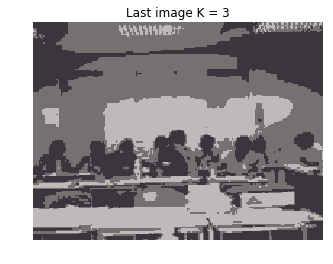

In [27]:
plt.figure(8)
plt.title('Last image K = 3')
plt.imshow(last_pix)
plt.axis('off')
plt.show()

# EnergyPlot K = 3

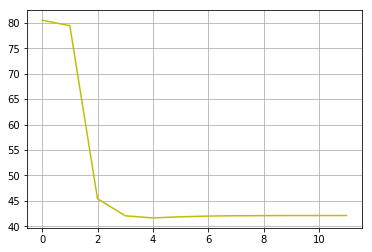

In [28]:
plt.figure(9)
x_range = np.arange(iter_num+1)
plt.plot(x_range,E,"y")
plt.grid(True)
plt.show()